###### Importing

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# MatPlot

### Day 1 - Line Plots

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


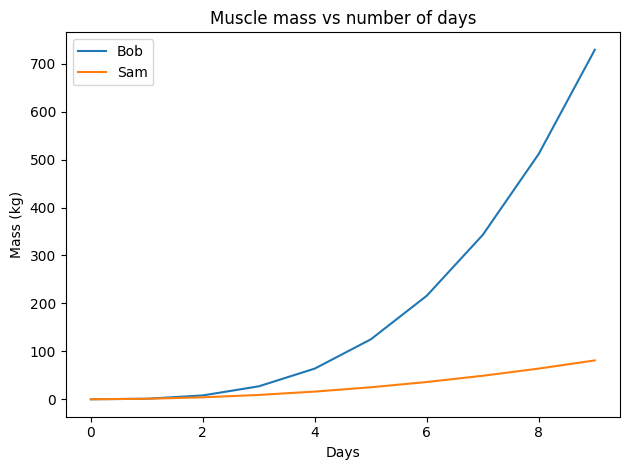

In [2]:
from matplotlib import pyplot as plt
import numpy as np
# plt.xkcd()
plt.rcdefaults()
print(plt.style.available)
width=0.5

dev_x = np.array(list(range(10)))
dev_y = np.multiply(np.array(dev_x),(np.array(dev_x)))
dev_y1 = np.power(np.array(dev_x),3)

plt.title('Muscle mass vs number of days')
plt.xlabel('Days')
plt.ylabel('Mass (kg)')

plt.plot(dev_x,dev_y1)
plt.plot(dev_x,dev_y)
plt.legend(["Bob","Sam"]) # Legends
plt.tight_layout()
plt.show()

## Day 2 - Bar Charts and CSVs

The following uses the collections module. It's a bit messy, but still interesting

In [3]:
import csv
from collections import Counter
plt.style.use('fivethirtyeight')
counter = Counter()

Using the CSV module:

In [4]:


with open ('/content/sample_data/california_housing_train.csv') as csv_file:
  csv_reader = csv.DictReader(csv_file)
  counter = Counter()
  for row in csv_reader:
    counter.update(row['median_house_value'].split(';'))



Using the pandas dataframe module:

In [5]:
import pandas as pd
data=pd.read_csv('/content/sample_data/california_housing_train.csv')
pval = data['median_house_value']

p_counter = Counter()
p_counter.update(pval)
counter = p_counter



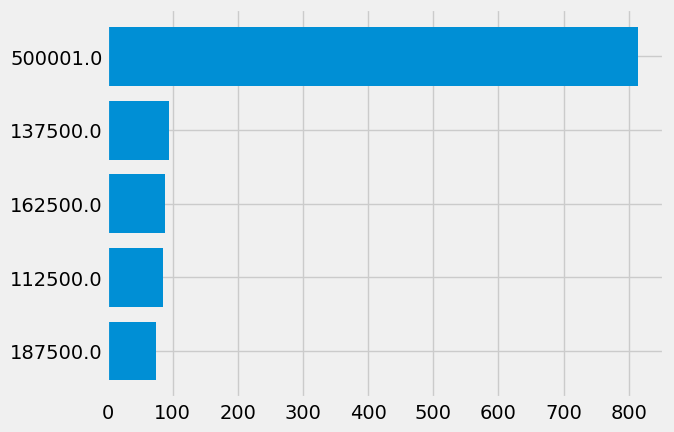

In [6]:
values=[]
freq = []

for i in counter.most_common(5):
  values.append(str(i[0]))
  freq.append(i[1])

values.reverse()
freq.reverse()

plt.barh(values,freq)
plt.show()



## Day 3 - Pie Charts

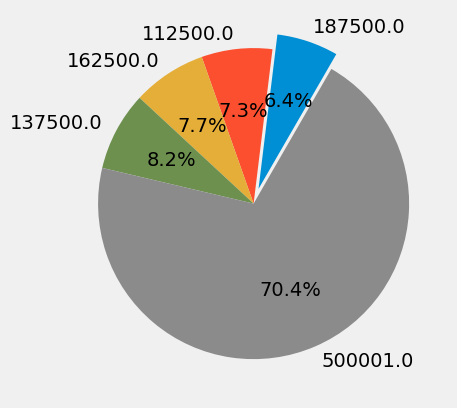

['187500.0', '112500.0', '162500.0', '137500.0', '500001.0']


In [7]:
slices = [10,20,30,40]
labels = ['Chocolate','Vanilla','Mint','Strawberry']
explode = [0.1,0,0,0,0]
slices.sort()
plt.pie(freq,labels=values,explode = explode,startangle=60,autopct='%0.1f%%')
plt.show()
print(values)

## Day 4 - Stack Plots


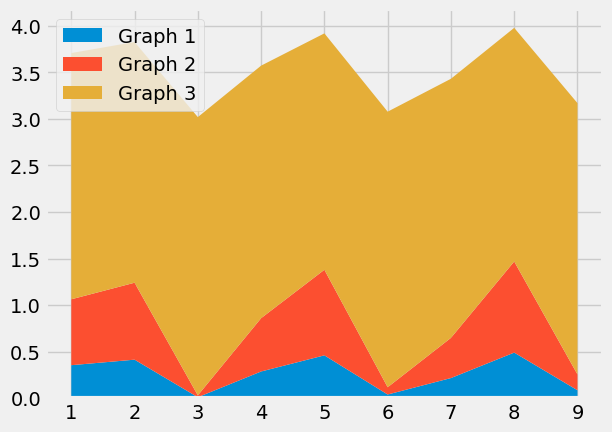

In [8]:
arr = np.array(range(9))+1
labels = ["Graph 1","Graph 2","Graph 3",]
plt.stackplot(arr, 0.5*np.sin(arr)**2,np.sin(arr)**2,3-0.5*np.sin(arr)**2,labels=labels)
plt.legend(loc="upper left")

## Day 5 - Plot Fills

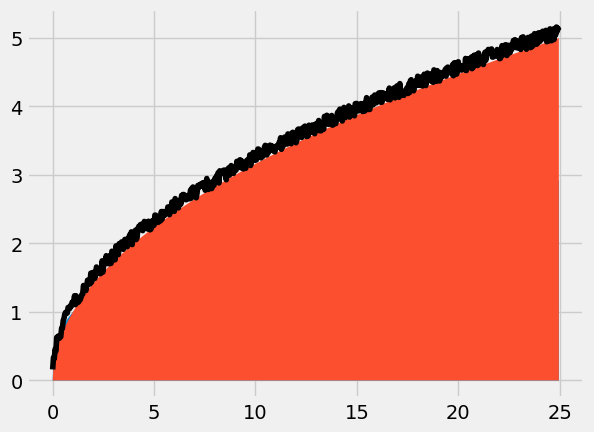

In [9]:
arr = np.array(range(25*25))
rand1 = np.random.rand(1,25*25)
sum = np.add(arr**0.5,rand1)
plt.plot(arr/25,  sum.T/5, color='black')
plt.fill_between(arr/25,(arr/25)**(1/3))
plt.fill_between(arr/25,(arr/25)**0.5)
# list(range(25)).shape


## Day 6 - Histograms

Histograms create bins

Some mock data for experimenting

(array([5., 0., 1., 2.]),
 array([ 0, 20, 40, 60, 80]),
 <a list of 4 Patch objects>)

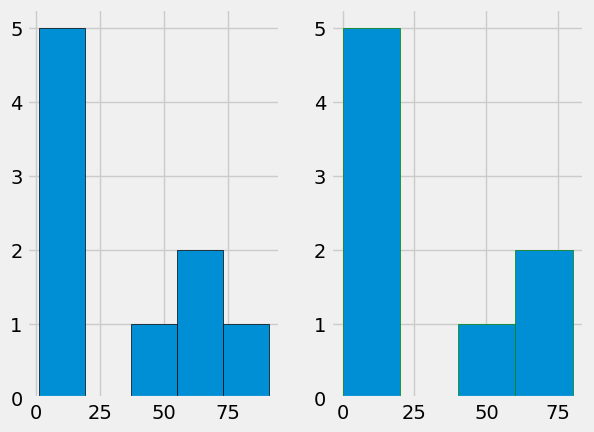

In [10]:
arr = [1,2,6,8,8,54,63,72,91]
fig,ax = plt.subplots(nrows=1,ncols=2)
bins = [0,20,40,60,80]
ax[0].hist(arr, bins=5,edgecolor='black') # Splits data into 5 bins, graphs with an edgecolor of black
ax[1].hist(arr,bins=bins,edgecolor='green')


With the housing data, notice that there seems to be a cap at the right end, resulting in a large spike there. It becomes more noticeable as the number of bins are increased, since the other bins will have lesser samples within them.

Greater bins means more detail, but also more noise. Fewer bins means less detail, but you can get a general sense of its distribution.

In [11]:
med_house = data['median_house_value'].median()
med_income = data['median_income'].median()

Text(0, 0.5, 'Median Income')

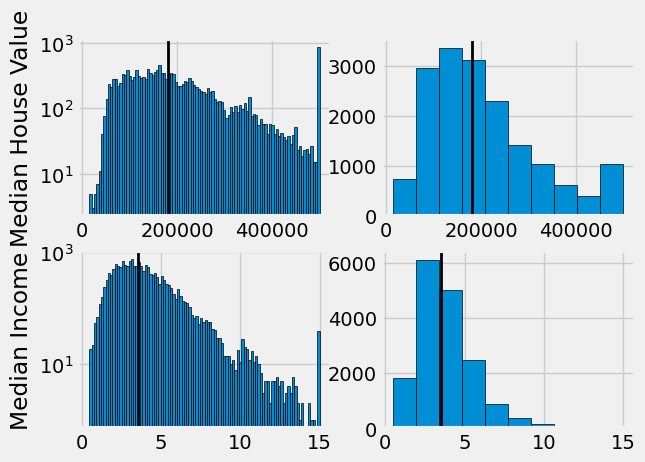

In [14]:
fig,ax = plt.subplots(nrows=2,ncols=2)
ax[0][0].hist(data['median_house_value'],bins=100,edgecolor='black',log=True)
ax[0][1].hist(data['median_house_value'],bins=10,edgecolor='black')
ax[1][0].hist(data['median_income'],bins=100,edgecolor='black',log=True)
ax[1][1].hist(data['median_income'],bins=10,edgecolor='black')
for i in range(2):
  for j in range(2):
    if j==0:
      ax[j][i].axvline(med_house,color='black',linewidth=2)
    if j==1:
      ax[j][i].axvline(med_income,color='black',linewidth=2)

ax[0][0].set_ylabel('Median House Value')
ax[1][0].set_ylabel('Median Income')

## Day 7 - Scatter Plots

In [50]:
a=500
x = np.random.randn(a)
y = np.random.randn(a)
colors = np.array(range(a))/a
sizes = x*100

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


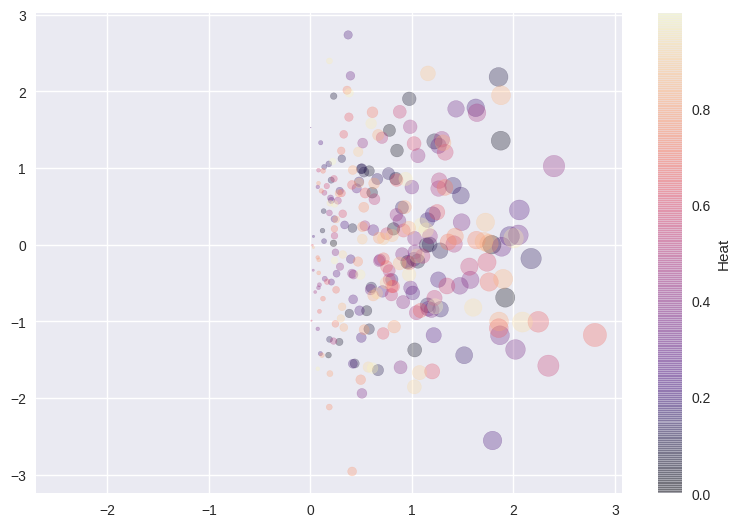

In [51]:
plt.style.use('seaborn')
plt.scatter(x,y,alpha=0.3,s=sizes,c=colors,cmap='magma')

cbar = plt.colorbar() # creates a colorbar
cbar.set_label('Heat')



plt.tight_layout()

Below we used cmap to differentiate outliers with ones the follow the linear trend well. The lack of variety in color reveals that both median income and average number of bedrooms per household are both good predictors of median house value

Text(0.5, 0, 'Average bedrooms per house')

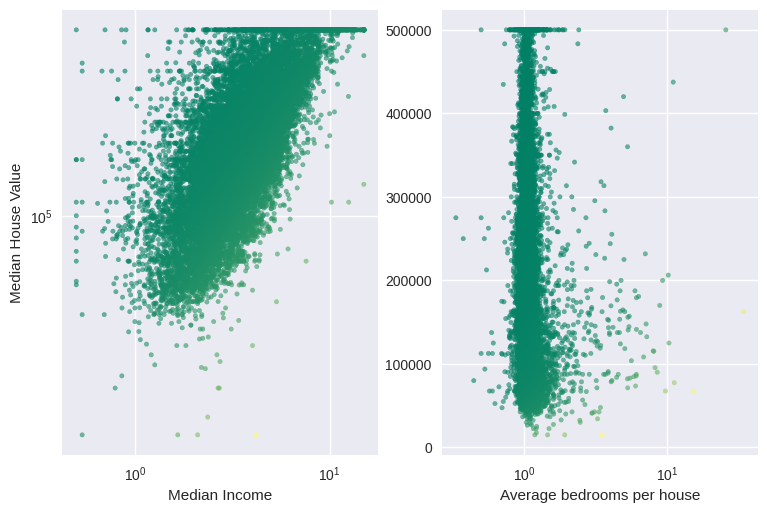

In [72]:
fig,ax = plt.subplots(nrows=1,ncols=2)
ax[0].scatter(data['median_income'],data['median_house_value'],
              s=10,alpha=0.6,c=data['median_income']/data['median_house_value'], cmap='summer')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('Median Income')
ax[0].set_ylabel('Median House Value')
ax[1].scatter(data['total_bedrooms']/data['households'],data['median_house_value']
              ,s=10,alpha=0.6,c=data['total_bedrooms']/data['households']/data['median_house_value'],cmap='summer')
ax[1].set_xscale('log')
# ax[1].set_yscale('log')
ax[1].set_xlabel('Average bedrooms per house')


## Day 10 - Sub Plots

In [ ]:
fig,ax = plt.subplots(nrows = 2, ncols=1,sharex=True)


ax[0].plot(dev_x,dev_y1) 
ax[1].plot(dev_x,dev_y)
ax[0].set_title('Mushroom mass vs number of days')
ax[0].set_ylabel('Mass (kg)')
ax[1].set_ylabel('Mass (kg)')

ax[0].legend(['P1'])
ax[1].legend(['P2'])
# ax[0].set_xlabel('Days')
ax[0].set_ylabel('Mass (kg)')
plt.tight_layout()


# Credits

I used Corey Schafer's youtube series. 

You can find the first episode of his playlist [here](https://www.youtube.com/watch?v=UO98lJQ3QGI)